# Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os
import sys

## Configuracion del path del sistema para la carpeta de donde se importan funciones

In [2]:
sys.path.append(os.path.abspath(r'C:\Users\Felipe\Desktop\THE-BRIDGE\THEBRIDGE-BOOTCAMP-GITHUB\DS102024'))

## Leer archivo csv limpio tras el primer análisis y crear la copia para trabajar con los datos

In [3]:
data_set = pd.read_csv('vgsales_limpio.csv', index_col=0)

In [4]:
df = data_set.copy()

# Análisis exploratório de datos (EDA)

## Análisis univariado

### Estadisticas descriptivas

In [77]:
resumen = []

for columna in df.columns:
    data = df[columna]
    tipo_dato = df[columna].dtype

    if tipo_dato in ['float64','int64']:
        var_tipo = 'numerica'
        card_absoluta = data.nunique()
        card_relativa = (data.nunique() / len(df)) * 100
        missing_pct = round(df[columna].isnull().mean()*100,2)
        rango = (data.min(), data.max())
        moda = data.mode()[0] if not data.mode().empty else np.nan
        mean_val = data.mean()
        median_val = data.median()
        skew_val = data.skew()
        kurtosis_val = data.kurtosis()
        std_deviation_val = data.std()
        asimetria = 'positiva' if moda < median_val < mean_val else ('simetrica' if mean_val == median_val == moda else 'negativa')
        # Shapiro test
        stat_, p_ = stats.shapiro(data) if len(data) > 3 else (np.nan, np.nan) 
        normal_test = 'No normal' if p_ < 0.05 else 'Normal'
        dist = 'No Gaussiana' if p_ < 0.05 else 'Gaussiana'
        # calculo de outliers
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 -Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outliers = (data < limite_inferior) | (data > limite_superior)
        outliers_pct = round((outliers.sum() / len(data)) * 100,2)
        resumen.append([columna, tipo_dato, var_tipo, card_absoluta, card_relativa, dist, missing_pct, outliers_pct, rango, moda, median_val, mean_val, std_deviation_val, skew_val, kurtosis_val, normal_test, asimetria])
    else:
        var_tipo = 'categorica'
        card_absoluta = data.nunique()
        card_relativa = (data.nunique() / len(df)) * 100
        # Para categoricas no se aplica normalidad
        missing_pct = round(df[columna].isnull().mean()*100,2)
        resumen.append([columna, tipo_dato, var_tipo, card_absoluta, card_relativa, None, missing_pct, None, None, None, None, None, None, None, None])

resumen_df = pd.DataFrame(resumen, columns=['variable', 'tipo de dato', 'tipo de variable', 'cardinalidad abs' ,'cardinalidad %', 'distribucion', '% missing', '% Outliers', 'rango', 'moda', 'mediana', 'media', 'desv estandar', 'asimetria', 'curtosis', 'prueba normalidad', 'asimetria'])
resumen_df

c:\Users\Felipe\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-D1404OgA-py3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16592.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Felipe\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-D1404OgA-py3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16592.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Felipe\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-D1404OgA-py3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16592.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Felipe\AppData\Local\pypoetry\Cache\virtualenvs\bootcamp-ds-D1404OgA-py3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.p

,variable,tipo de dato,tipo de variable,cardinalidad abs,cardinalidad %,distribucion,% missing,% Outliers,rango,moda,mediana,media,desv estandar,asimetria,curtosis,prueba normalidad,asimetria
0,Name,object,categorica,11490,69.250241,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1,Platform,object,categorica,31,0.186837,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2,Year,int64,numerica,39,0.235053,No Gaussiana,0.0,1.94,"(1977, 2016)",2008.00,2007.00,2006.384824,5.861057,-1.060233,2.119000,No normal,negativa
3,Genre,object,categorica,12,0.072324,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None
4,Publisher,object,categorica,616,3.712633,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None
5,NA_Sales,float64,numerica,409,2.465043,No Gaussiana,0.0,10.13,"(0.0, 41.49)",0.00,0.08,0.264746,0.816818,18.796829,648.927996,No normal,positiva
6,EU_Sales,float64,numerica,305,1.838235,No Gaussiana,0.0,12.54,"(0.0, 29.02)",0.00,0.02,0.146705,0.505435,18.872680,755.791791,No normal,positiva
7,JP_Sales,float64,numerica,244,1.470588,No Gaussiana,0.0,14.62,"(0.0, 10.22)",0.00,0.00,0.077806,0.309344,11.204490,194.165937,No normal,negativa
8,Other_Sales,float64,numerica,157,0.946239,No Gaussiana,0.0,10.03,"(0.0, 10.57)",0.00,0.01,0.048079,0.188621,24.230051,1025.011194,No normal,positiva
9,Global_Sales,float64,numerica,623,3.754822,No Gaussiana,0.0,11.41,"(0.01, 82.74)",0.02,0.17,0.537613,1.555282,17.398104,603.748290,No normal,positiva


### Visualización de histogramas, kde y violinplots

#### Variables numéricas

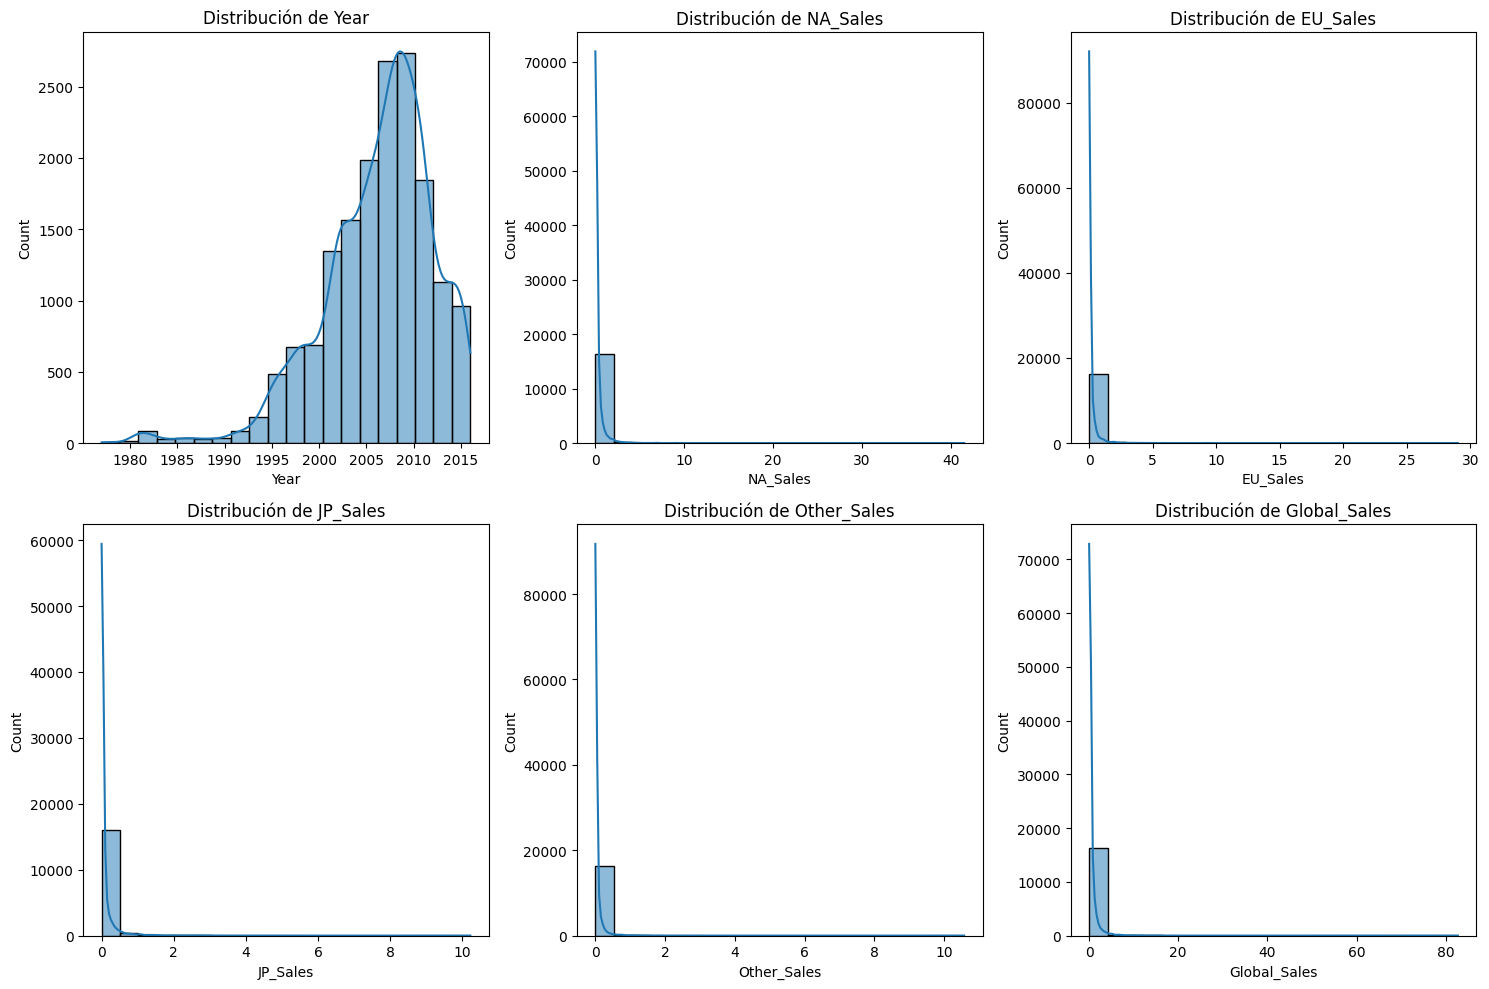

In [6]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(2, 3 , i+1)
    sns.histplot(data = df, kde=True , x = feature, bins=20)
    plt.title(f'Distribución de {feature}')

plt.tight_layout()
plt.show()

In [7]:
# df_melted = df.melt(id_vars=['Name','Platform','Year','Genre','Publisher'],
#                     var_name='Continent',
#                     value_name='Sales')

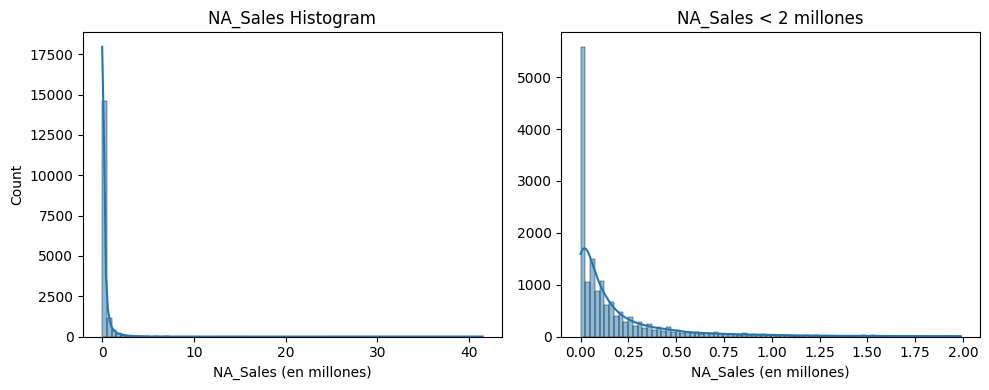

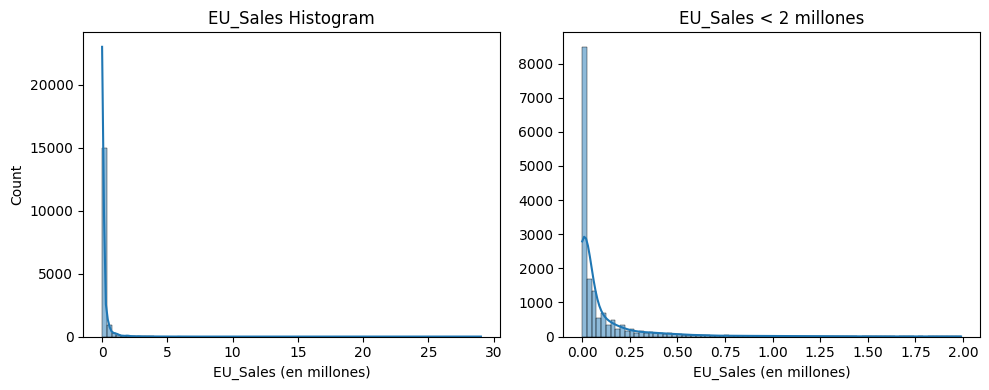

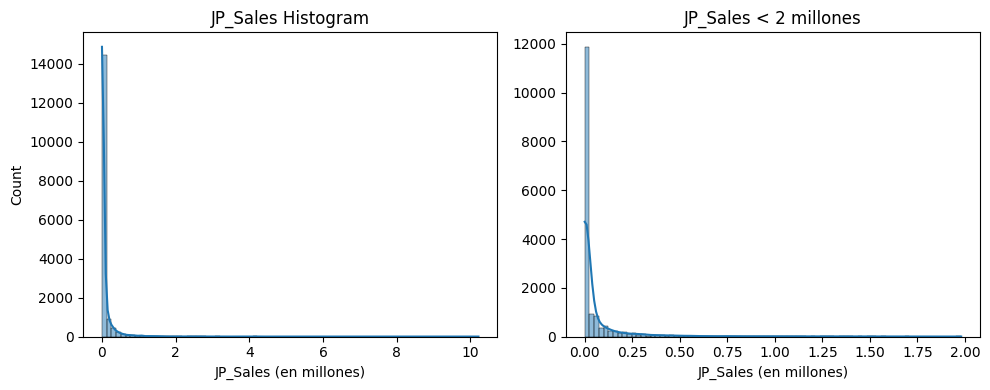

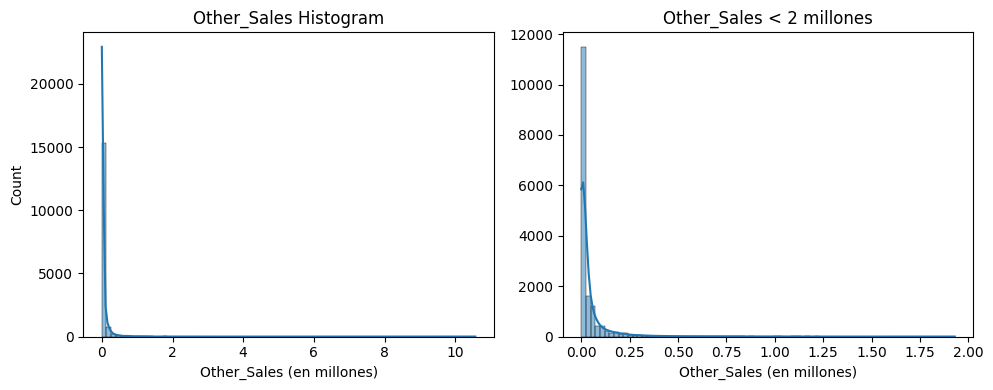

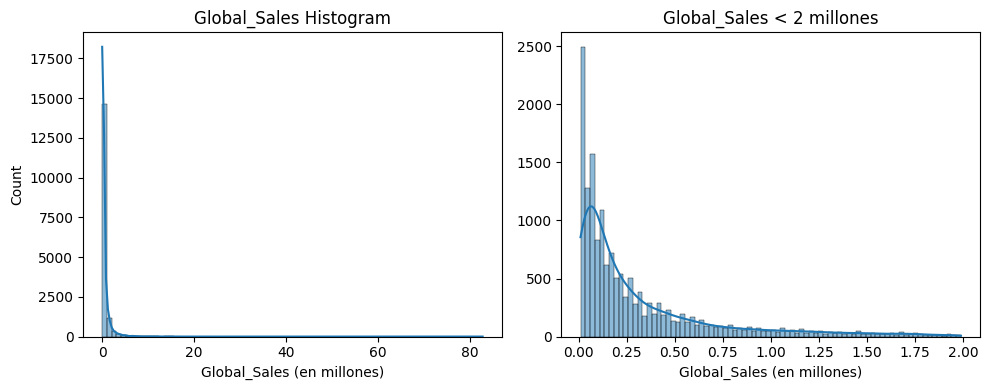

In [73]:
filtrado_ventas_por_continente_menor_que_2k = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

for col in filtrado_ventas_por_continente_menor_que_2k:

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    # Plot histograma para todo el dataset
    sns.histplot(data=df, kde=True, x=col, bins=80, ax=axs[0])
    axs[0].set_title(f'{col} Histogram')
    axs[0].set_xlabel(f'{col} (en millones)')
    # axs[0].set_ylabel('Frequency')

    # Filtro de los datos para menores que 2 millones
    df_filtered = df[df[col] < 2] 

    # Plot histograma para los datos filtrados
    sns.histplot(data=df_filtered, kde=True, x=col, bins=80, ax=axs[1])
    axs[1].set_title(f'{col} < 2 millones')
    axs[1].set_xlabel(f'{col} (en millones)')
    axs[1].set_ylabel('') 

    plt.tight_layout()
    plt.show()

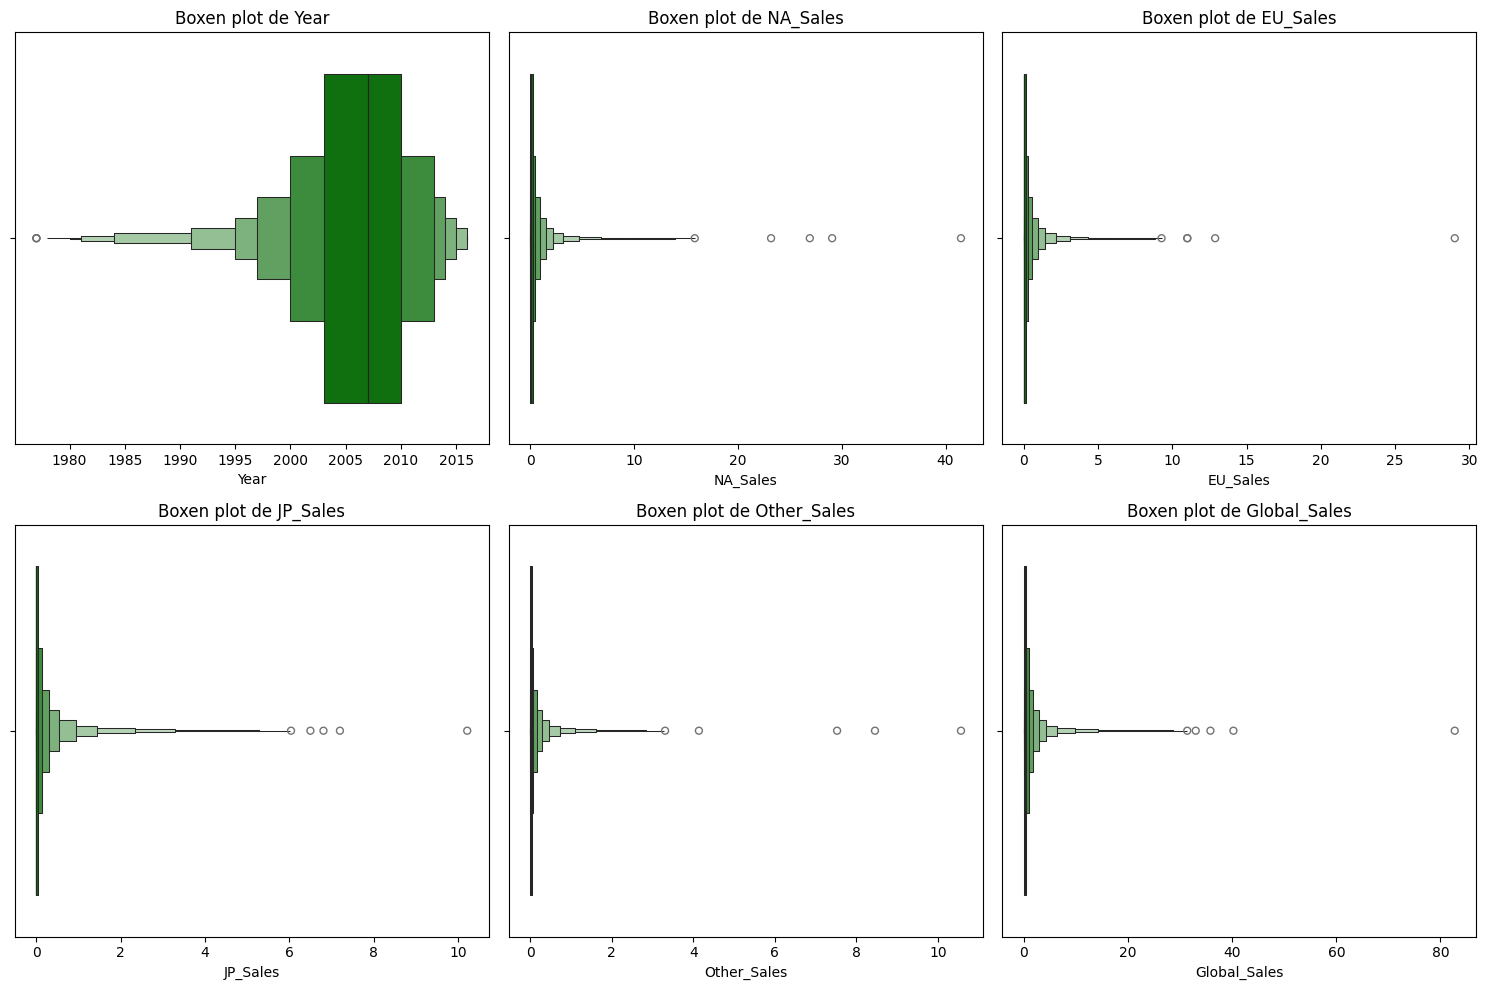

In [9]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(2, 3 , i+1)
    sns.boxenplot(x=df[feature], color='green')
    plt.title(f'Boxen plot de {feature}')

plt.tight_layout()
plt.show()

##### Análisis de gráficos

* Columnas de ventas por continente
    * Histogramas
        * Los histogramas muestram las distribuciones de ventas originarias del dataset.
        * Las ventas por cada continente está concentrada a la isquierda, lo que indica assimetria positiva, lo que nos muestra en este caso que la mayor parte de las ventas se concentran en valores más bajos que 2 millones de dolares.
    * Boxen plots
        * Los boxen plots confirman la concentración de datos en los primeros tres cuantiles y que en raras ocasiones algunos juegos alcanzan los valores de ventas más altos,  estes juegos aqui se representan como valores atipicos significativos.

Se puede observar que las variables numericas poseen distribuciones no Gaussianas, lo que sugiere que dichas variables no siguen una distribución normal. 
Todas las variables numericas tienen considerable cuantidad de outliers, lo que indica la presencia de muchos valores extremos que potencialmente pueden desviar los resultados del análisis, los altos valores presentados en las columnas `asimetria` y `curtosis` confirmam este hallazgo.
Se observa tambien que no existen valores nulos para las variables numéricas, este es un aspecto positivo para el análisis de este conjunto de datos.

#### Variables categóricas

In [10]:
from auto_importer import *

In [11]:
desc_df = DataFrameDescriber(df)

In [12]:
desc_df.describe_categorico()

,Name,Platform,Genre,Publisher
count,16592,16592,16592,16592
unique,11490,31,12,616
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2162,3315,1354


In [13]:
resumen_df[resumen_df['tipo de variable'] == 'categorica']

,variable,tipo de dato,tipo de variable,cardinalidad abs,cardinalidad %,distribucion,% missing,% Outliers,rango,moda,mediana,media,desv estandar,asimetria,curtosis,prueba normalidad,asimetria
0,Name,object,categorica,11490,69.250241,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1,Platform,object,categorica,31,0.186837,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None
3,Genre,object,categorica,12,0.072324,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None
4,Publisher,object,categorica,616,3.712633,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None


In [17]:
# # pd.set_option('display.max_rows', None)
# publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
# publisher_sales = pd.DataFrame(publisher_sales)
# top_30_publishers = publisher_sales.head(30)
# top_30_publishers

# df['Publisher_Agrupados'] = df['Publisher'].apply(lambda x: x if x in top_30_publishers.index else ' Other')

In [18]:
columnas_categoricas = df.select_dtypes(include='object').columns

In [19]:
frecuencia_abs_categoricos = {
    col: df[col] for col in columnas_categoricas
}

In [22]:
# columnas_categoricas = columnas_categoricas.drop(['Name','Publisher'])
columnas_categoricas

Index(['Platform', 'Genre', 'Publisher_Agrupados'], dtype='object')

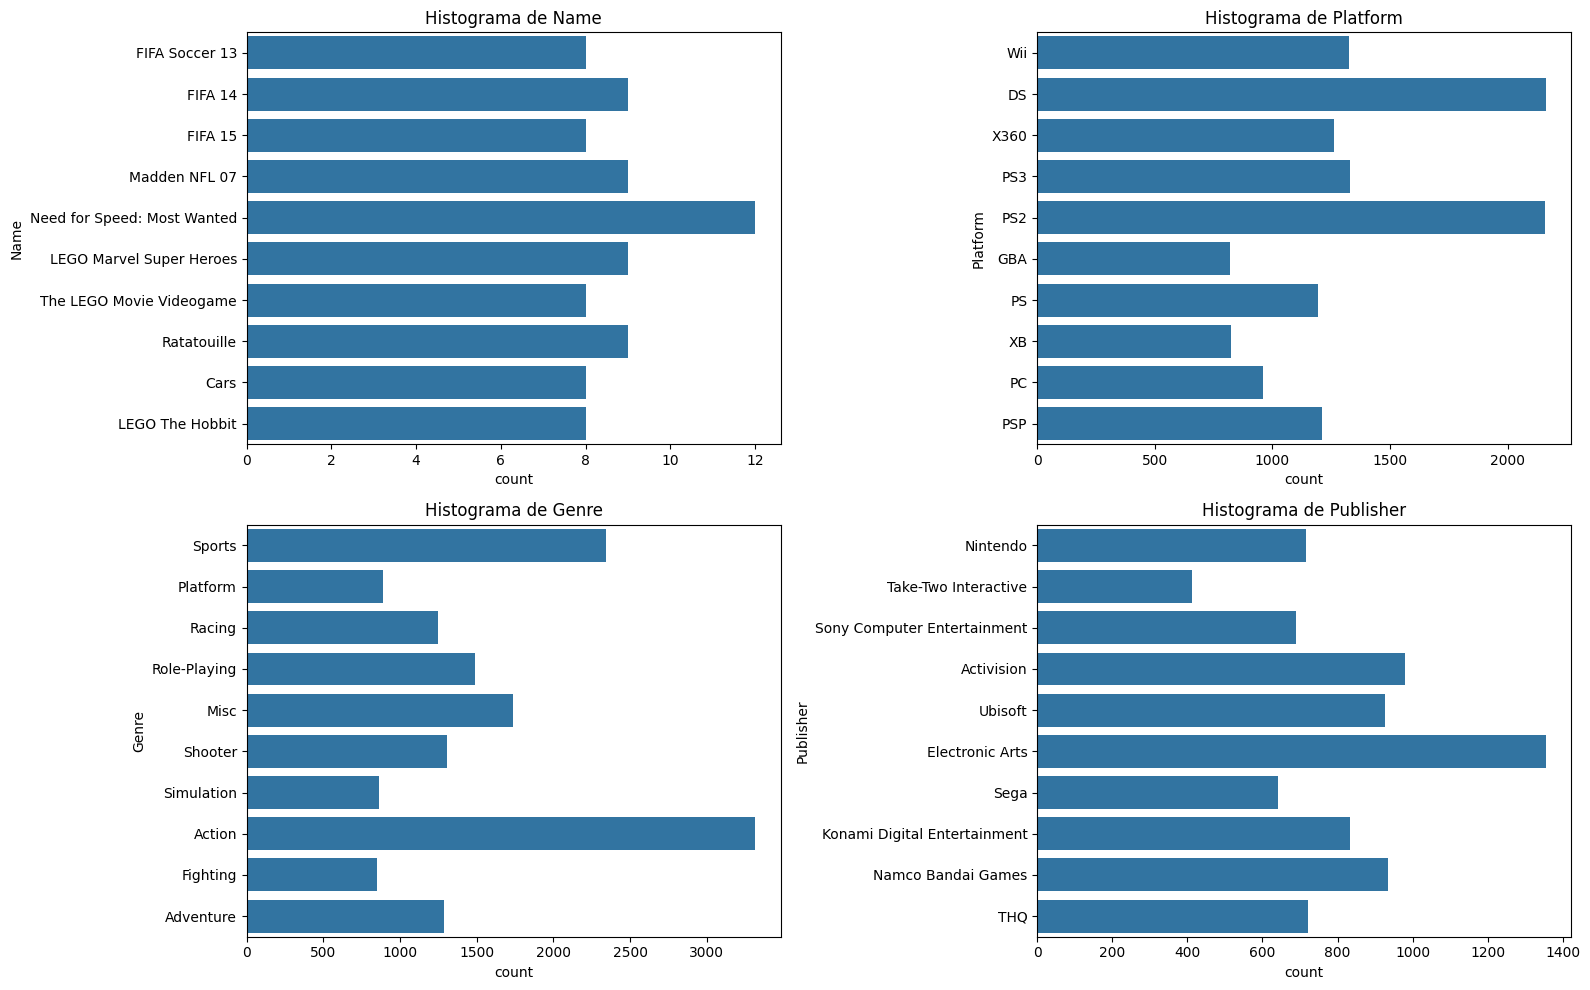

In [19]:
plt.figure(figsize=(16,10))
for i, col in enumerate(columnas_categoricas):
    top_10 = df[col].value_counts().head(10)
    df_filtrado_top_10 = df[df[col].isin(top_10.index)]
    plt.subplot(2,2, i+1)
    sns.countplot(df_filtrado_top_10[col])
    plt.title(f'Histograma de {col}')
    # plt.xticks(rotation=80)
    # print(df[feature].value_counts().head(10))
plt.tight_layout()
plt.show()

#### Análisis de gráficos

* Columna Name
    * En la columna names se observa que algunos juegos se repiten muchas veces, lo que indica que estes juegos fueron lanzados para múltiples plataformas.

* Columna Platform
    * En esta columna se observa que dos plataformas son por lejos las que más juegos lanzarón, pero los demás aparecen con números relevantes relacionados a lanzamientos.

* Columna Genre
    * La columna de generos nos muestra que los generos acción y deporte son las categorias más populares, pero las que vienen a continuación están más cerca entre sí.

* Columna Publisher
    * Esta columna nos muestra una distribución con menos dispersión.

C:\Users\Felipe\AppData\Local\Temp\ipykernel_25696\2419803857.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, ax=axes[idx], palette='Set2')
C:\Users\Felipe\AppData\Local\Temp\ipykernel_25696\2419803857.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, ax=axes[idx], palette='Set2')
C:\Users\Felipe\AppData\Local\Temp\ipykernel_25696\2419803857.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, ax=axes[idx], palette='Set2')


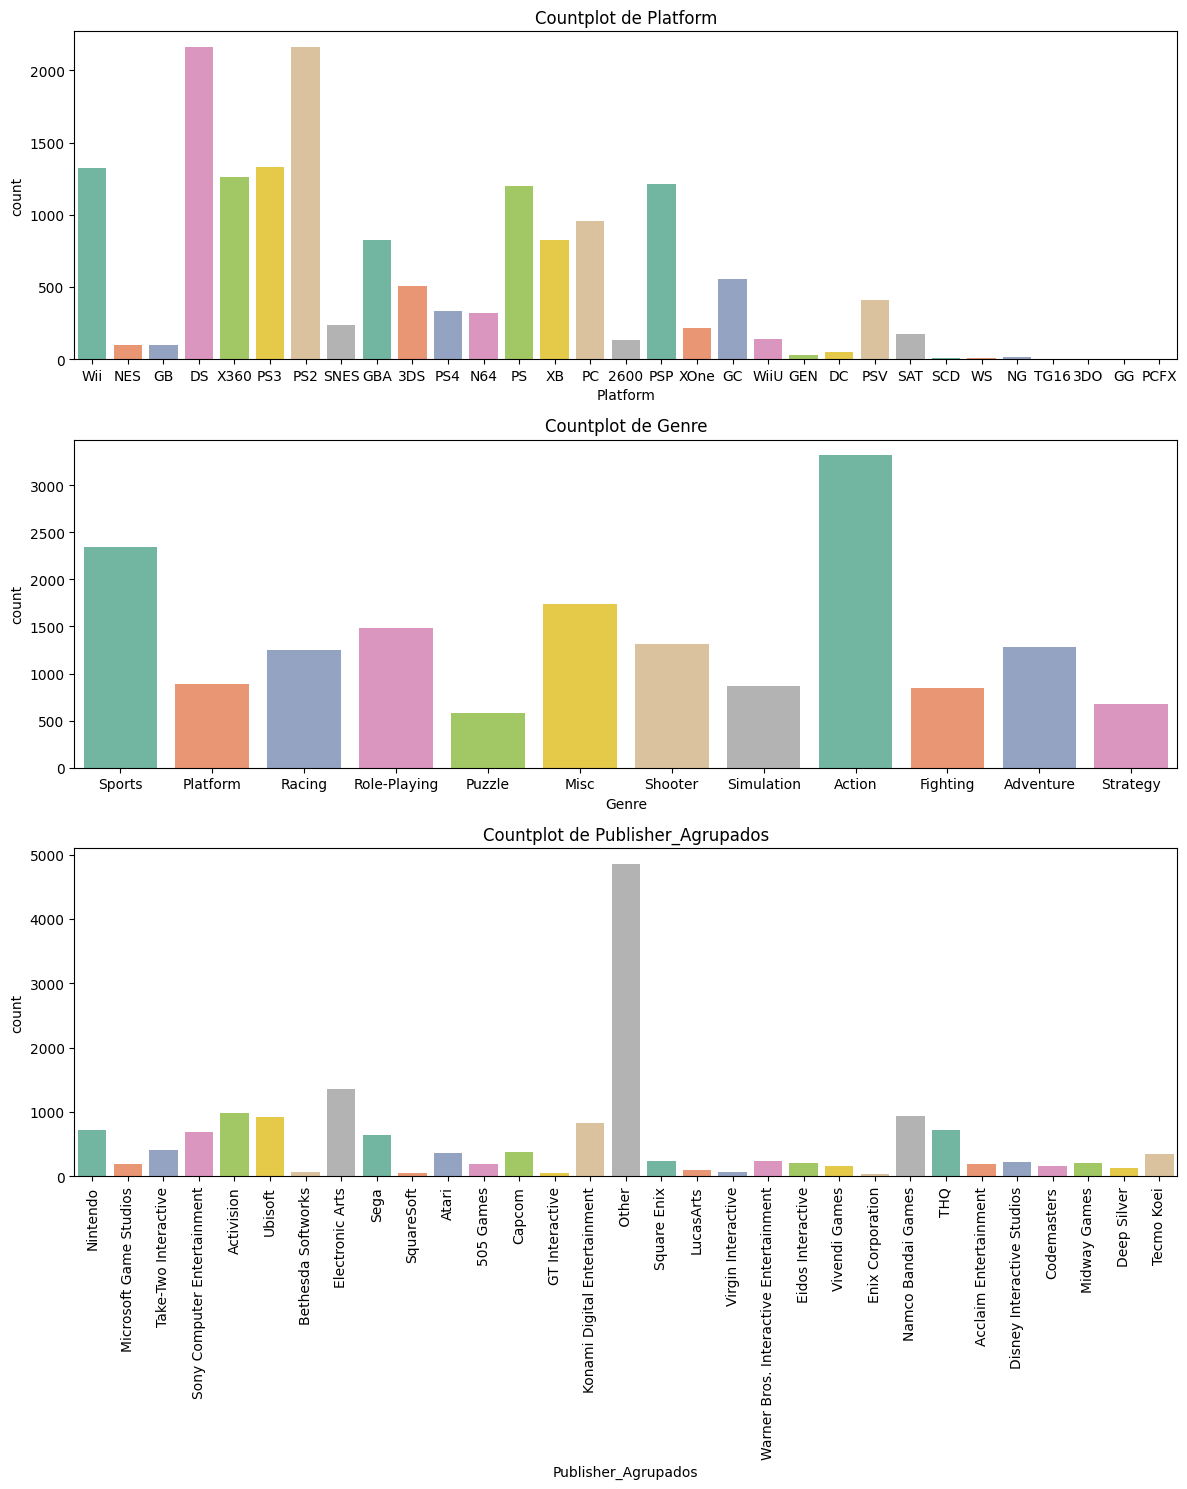

In [ ]:
# # Crear una figura para los gráficos
# fig, axes = plt.subplots(len(columnas_categoricas), 1, figsize=(12, 5 * len(columnas_categoricas)))

# # Graficar para columnas categóricas
# for idx, column in enumerate(columnas_categoricas):  # Usamos idx para iterar
#     unique_values = df[column].nunique()  # Número de valores únicos
    
#     if unique_values < 5:#Establecer un umbral para el número de valores únicos para decidir si hacer un piechart o un countplot. Es una elección personal
#         # Gráfico de pastel (pie chart)
#         value_counts = df[column].value_counts()
#         axes[idx].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
#         axes[idx].set_title(f'Gráfico de pastel de {column}')
#     else:
#         # Si quieres hacer un countplot en lugar del piechart, se puede hacer aquí
#         sns.countplot(data=df, x=column, ax=axes[idx], palette='Set2')
#         plt.xticks(rotation=90)
#         axes[idx].set_title(f'Countplot de {column}')

# # Ajustar espaciado
# plt.tight_layout()
# plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16592 entries, 1 to 16600
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 16592 non-null  object 
 1   Platform             16592 non-null  object 
 2   Year                 16592 non-null  int64  
 3   Genre                16592 non-null  object 
 4   Publisher            16592 non-null  object 
 5   NA_Sales             16592 non-null  float64
 6   EU_Sales             16592 non-null  float64
 7   JP_Sales             16592 non-null  float64
 8   Other_Sales          16592 non-null  float64
 9   Global_Sales         16592 non-null  float64
 10  Publisher_Agrupados  16592 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


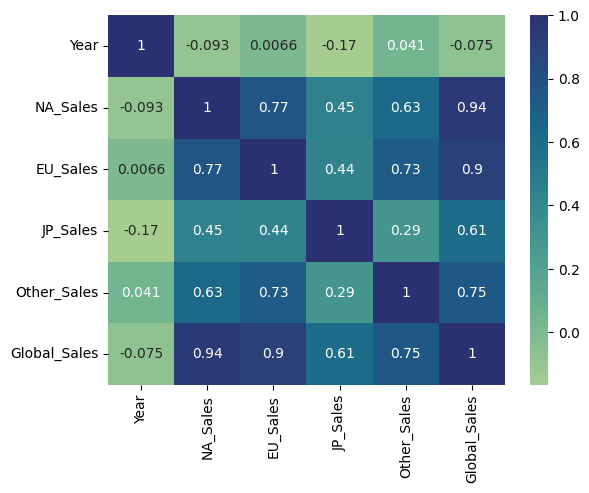

In [47]:
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='crest');

In [57]:
cols_numericas = df.select_dtypes(include='number')
# cols_numericas = cols_numericas.drop(['Year'])
cols_numericas.columns

Index(['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

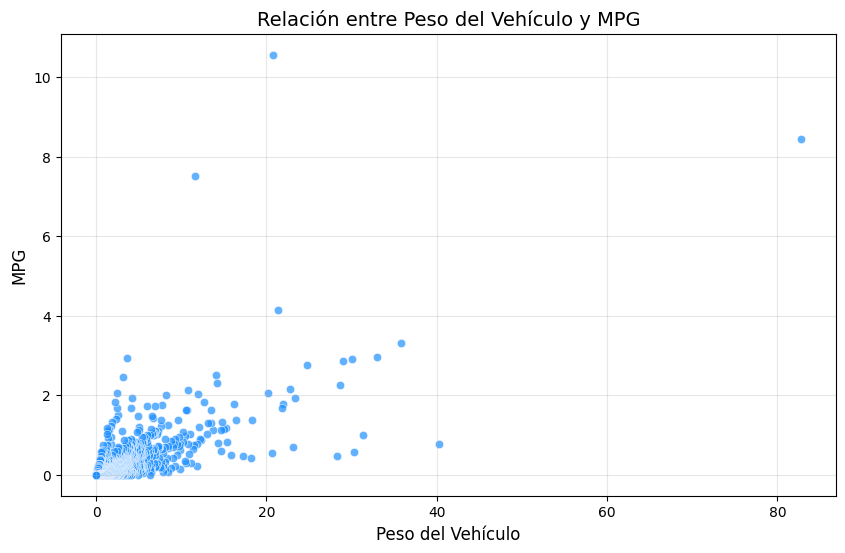

In [71]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Global_Sales', y='Other_Sales', alpha=0.7, color='dodgerblue')
plt.title('Relación entre Peso del Vehículo y MPG', fontsize=14)
plt.xlabel('Peso del Vehículo', fontsize=12)
plt.ylabel('MPG', fontsize=12)
plt.grid(alpha=0.3)

plt.show()

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

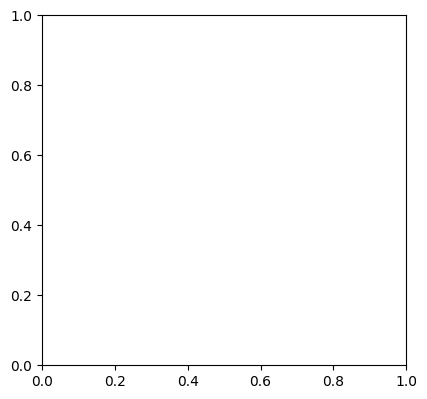

In [65]:
plt.figure(figsize=(16,10))
for i, col in enumerate(columnas_categoricas):
    plt.subplot(2,3, i+1)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Histograma de {col}')
    # plt.xticks(rotation=80)
    # print(df[feature].value_counts().head(10))
plt.title('QQ Plot de cols numericas')
plt.tight_layout()
plt.show()